In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## Sinusoidal Positional Encoding

- The original transformer uses:

    PE(pos,2i)​=sin(pos/100002i/d)

    PE(pos,2i+1)​=cos(pos/100002i/d)
<br>

- Even indices -> sine
- Odd indices -> cosine
- At each dimension frequency vary
- produce smooth, interpretable pattern

In [ ]:
## seq_len - number of token in the sequence.
## d_model = embedding dimentions (for e.g. 512)

def sinusoidal_positional_encoding(seq_len, d_model):
    pos = torch.arange(seq_len).unsqueeze(1)              # pos - (seq, 1)
    i = torch.arange(d_model).unsqueeze(0)                # i - (1, d)

    angles = pos / (10000 ** (2 * (i // 2) / d_model))    # seq X d_model
    # base angle for both functions
    ## // 2 - for grouping dimentions into pairs

    # apply sine to even indices, cosine to odd
    pe = torch.zeros(seq_len, d_model) # creating a (seq_len X d_model) tensor
    pe[:, 0::2] = torch.sin(angles[:, 0::2]) # even indices
    pe[:, 1::2] = torch.cos(angles[:, 1::2]) # odd indices
    return pe


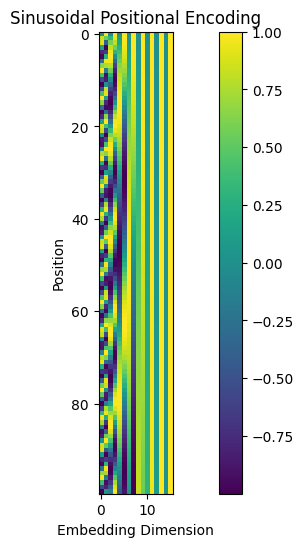

In [ ]:
## Visualize Sinusoidal Encodings

pe = sinusoidal_positional_encoding(seq_len=100, d_model=16)

plt.figure(figsize=(12, 6))
plt.imshow(pe, cmap="viridis")
plt.title("Sinusoidal Positional Encoding")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.colorbar()
plt.show()

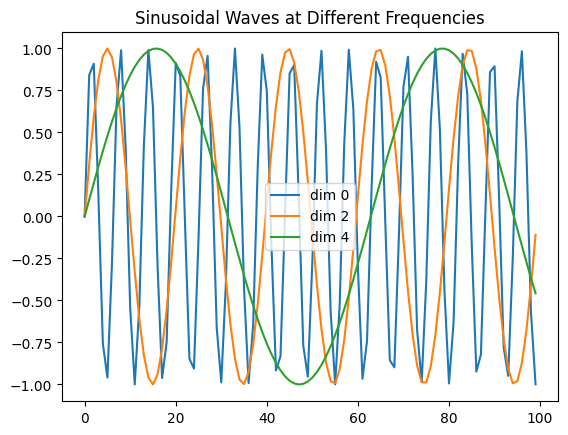

In [ ]:
plt.plot(pe[:, 0], label="dim 0")
plt.plot(pe[:, 2], label="dim 2")
plt.plot(pe[:, 4], label="dim 4")
plt.legend()
plt.title("Sinusoidal Waves at Different Frequencies")
plt.show()

## 8. Learnable Positional Encoding

Explain that:

Initial GPT, RoBERTa use learnable pos embeddings

Simply nn.Embedding(pos_len, d_model)

Trainable → better for specific tasks

### 9. Implement Learnable Positional Encoding

In [ ]:
class LearnablePositionalEncoding(nn.Module):
    def __init__(self, max_len, d_model):
        super().__init__()
        self.pos_emb = nn.Embedding(max_len, d_model)

    def forward(self, x):
        batch, seq_len, d = x.shape
        positions = torch.arange(seq_len).to(x.device) # (seq,) e.g for seq_len = 4, positions = [0,1,2,3,4]
        pos_encoding = self.pos_emb(positions)  # (seq, d)
        return x + pos_encoding # broadcast to all batches

## 10. Visualize Learnable Positional Embeddings (Random Init)

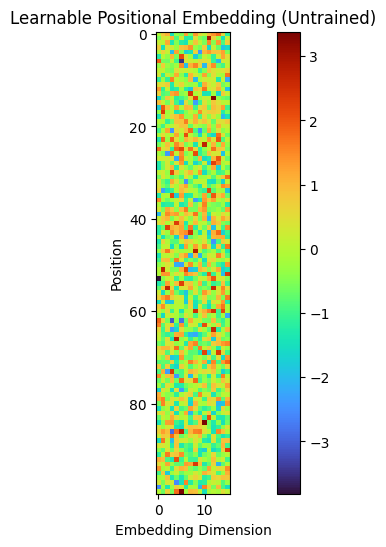

In [ ]:
model = LearnablePositionalEncoding(max_len=100, d_model=16)
pos = model.pos_emb.weight.detach().numpy()

plt.figure(figsize=(12, 6))
plt.imshow(pos, cmap="turbo")
plt.title("Learnable Positional Embedding (Untrained)")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.colorbar()
plt.show()


- we train positional encodings specific to data.
- often works better than sinusoidal

## 11. Side-by-side comparison plot

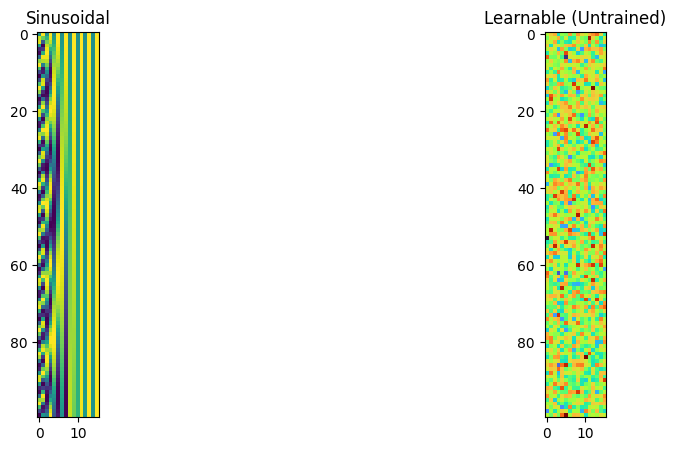

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(pe, cmap="viridis")
plt.title("Sinusoidal")

plt.subplot(1,2,2)
plt.imshow(pos, cmap="turbo")
plt.title("Learnable (Untrained)")
plt.show()